In [19]:
# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'
import pandas as pd

### 1.Dataset

In [147]:
df = pd.read_csv('../data/video_games_sales.csv').dropna()
df.shape

(6825, 16)

**Summary of the dataframe**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


We see that pandas has loaded some of the numerical features as object type. We will explicitly convert those columns into float and int.

In [4]:
df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

In [5]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]

df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


In [6]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73,8.0,192,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65,8.5,431,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41,6.6,129,Nintendo,E


### 2. DataFrame.plot()

As an example, **we will create a plot of video game sales by country and year**. First, let’s keep only the columns we need. Then, we will calculate the total sales by year and call the plot() method on the resulting DataFrame.

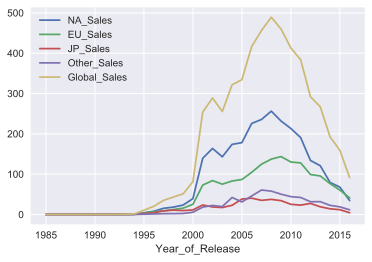

In [7]:
df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot()

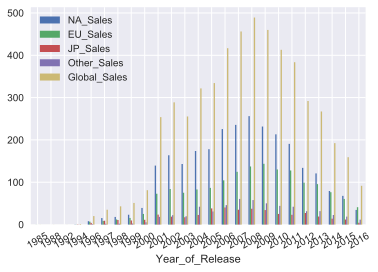

In [8]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind = 'bar', rot=30)

**pairplot()**

In [11]:
?sns.pairplot

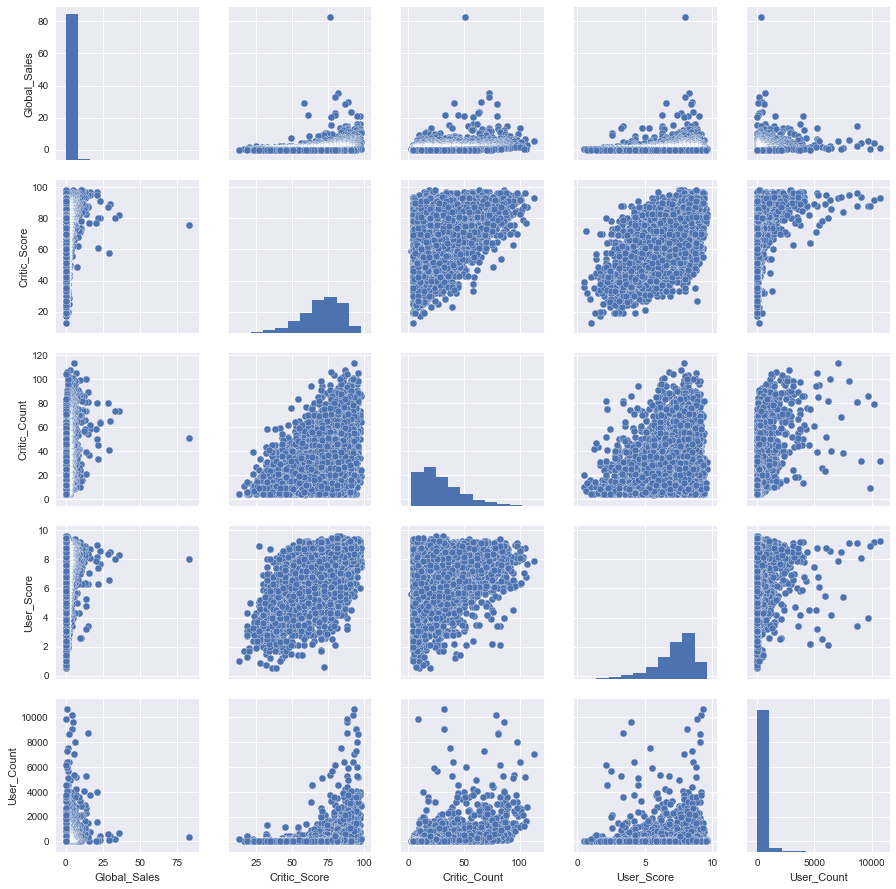

In [15]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count', 
                 'User_Score', 'User_Count']]);

It is also possible to plot a distribution of observations with seaborn's distplot(). For example, let's look at the distribution of critics' ratings: Critic_Score. By default, the plot displays a histogram and the kernel density estimate.

In [17]:
?sns.distplot()

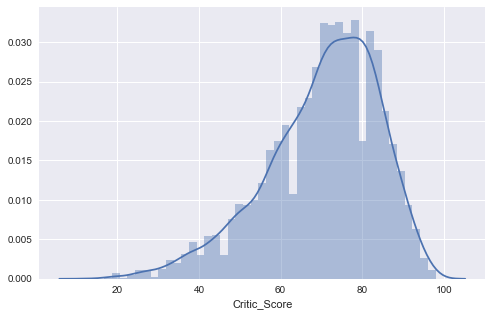

In [20]:
%config InlineBackend.figure_format='png'
sns.distplot(a=df['Critic_Score'])

**jointplot()** <br>
To look more closely at the relationship between two numerical variables, you can use joint plot, which is a cross between a scatter plot and histogram. Let's see how the Critic_Score and User_Score features are related.


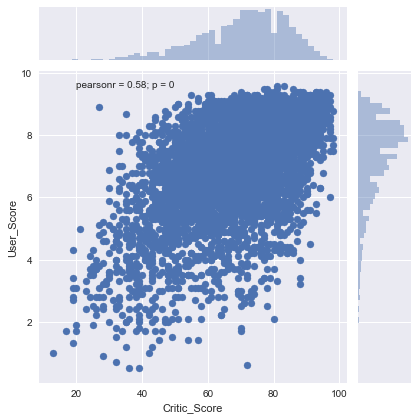

In [29]:
sns.jointplot(x=df['Critic_Score'], y=df['User_Score'], data=df, kind='scatter')

**boxplot()** <br>
Another useful type of plot is a box plot. Let's compare critics' ratings for the top 5 biggest gaming platforms.


In [30]:
?sns.boxplot()

In [56]:
top_platforms = df['Platform'].value_counts().sort_values(ascending=False).head(5).index.values

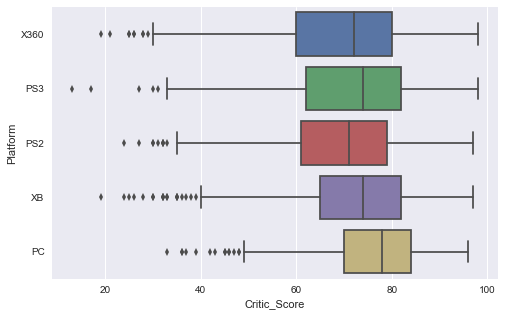

In [63]:
sns.boxplot(y='Platform', x='Critic_Score', data=df[df['Platform'].isin(top_platforms)], orient='h')

**heatmap()**

The last type of plot that we will cover here is a heat map. A heat map allows you to view the distribution of a numerical variable over two categorical ones. Let’s visualize the total sales of games by genre and gaming platform.

In [75]:
?sns.heatmap()

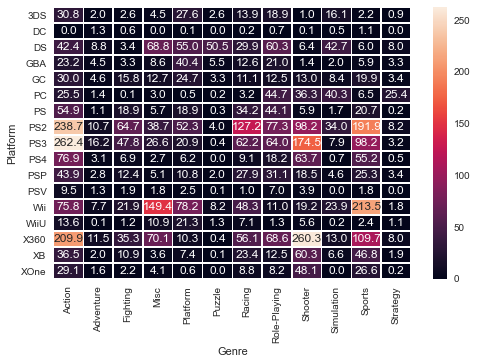

In [96]:
platform_genre_sales = df.pivot_table(index='Platform',
                                     columns='Genre',
                                     values='Global_Sales',
                                     aggfunc='sum').fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5);

### 4. Plotly

In [103]:
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

**Line plot** <br>
First of all, let’s build a line plot showing the number of games released and their sales by year.

In [148]:
year_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count())

# riemertoj kolonat
year_df.columns = ['Global_Sales', 'Number_of_Games']

In [150]:
# Create a line (trace) for the global sales
trace0 = go.Scatter(x = year_df.index,
                    y = year_df['Global_Sales'],
                    name = 'Global sales'
                   )
# create a line (trace) for the number of games released 
trace1 = go.Scatter(x = year_df.index,
                    y = year_df['Number_of_Games'],
                    name = 'Number of games released'
                   )
# define data arrys
data = [trace0, trace1]

# set the title
layout = {'title': 'Statistics for video games'}

fig = go.Figure( data=data, layout=layout, )
iplot(fig, show_link=False)

#### Bar charts 

Let's use a bar chart to compare the market share of different gaming platforms broken down by the number of new releases and by total revenue.

In [161]:
platforms = df.groupby('Platform')[['Global_Sales']].sum().join(
df.groupby('Platform')[['Name']].count())

platforms.columns = ['Global_Sales', 'Number_of_Games']
platforms.sort_values('Global_Sales', ascending=False, inplace=True)

In [167]:
trace0 = go.Bar(
    x=platforms.index,
    y=platforms['Global_Sales'],
    name = 'Global sales'
)

trace1 = go.Bar(
    y=platforms['Number_of_Games'],
    x=platforms.index,
    name = 'Number of games released'
)

data = [trace0, trace1]
layout = {'title': 'Market share by gaming platform'}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

#### Box plot
plotly also supports box plots. Let’s consider the distribution of critics' ratings by the genre of the game.

In [180]:
for genre in df['Genre'].unique():
    data.append(
        go.Box(y=df[df['Genre'] == genre]['Critic_Score'], name=genre)
    )

iplot(data, show_link=False)